# Coordinate descent failure example

### Basic Imports

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import seaborn as sns
from functools import partial

sns.reset_defaults()
sns.set_context(context="talk", font_scale=1)
%matplotlib inline
%config InlineBackend.figure_format='retina'

In [ ]:
X = torch.linspace(-5, 5, 200).unsqueeze(-1)
Y = torch.linspace(-5, 5, 200).unsqueeze(0)
shape = torch.Size((X.shape[0], Y.shape[1]))
X = X.expand(shape)
Y = Y.expand(shape)

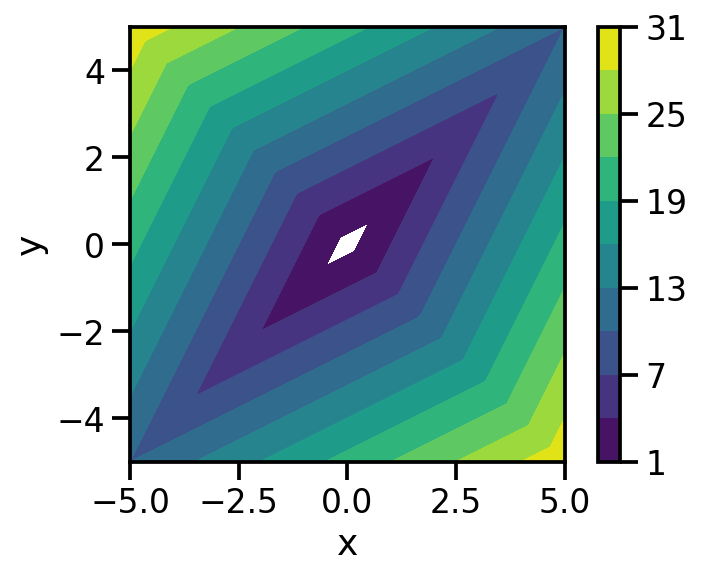

In [ ]:
def f(x, y):
    return torch.abs(x+y) + 3*torch.abs(y-x)

plt.contourf(X.numpy(), Y.numpy(), f(X, Y).numpy(), [1, 4, 7, 10, 13, 16, 19, 22, 25, 28, 31])
plt.xlabel("x")
plt.ylabel("y")
plt.colorbar()


plt.gca().set_aspect("equal")

In [ ]:
def plot_point(x, y):
    plt.contour(X.numpy(), Y.numpy(), f(X, Y).numpy(), levels=[1, 4, 7, 10, 13, 16, 19] )

    plt.scatter(x, y, zorder=5, color='k', s=100)
    plt.xlabel("x")
    plt.ylabel("y")
    plt.gca().set_aspect("equal")


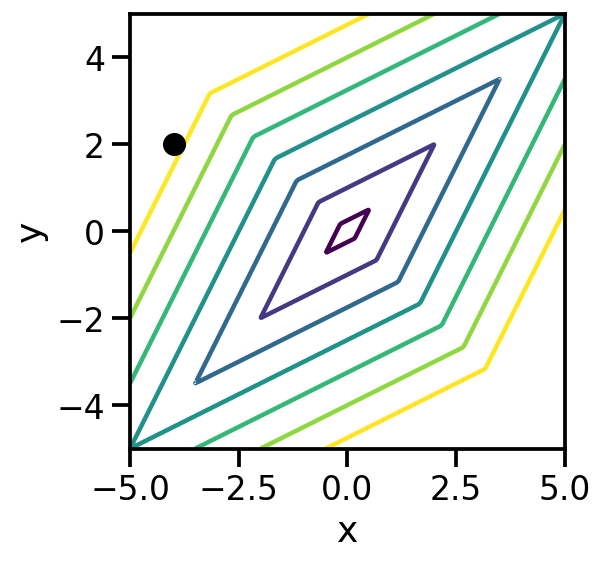

In [ ]:
x_start, y_start = -4, 2
plot_point(x_start, y_start)

Fix x2 = 2

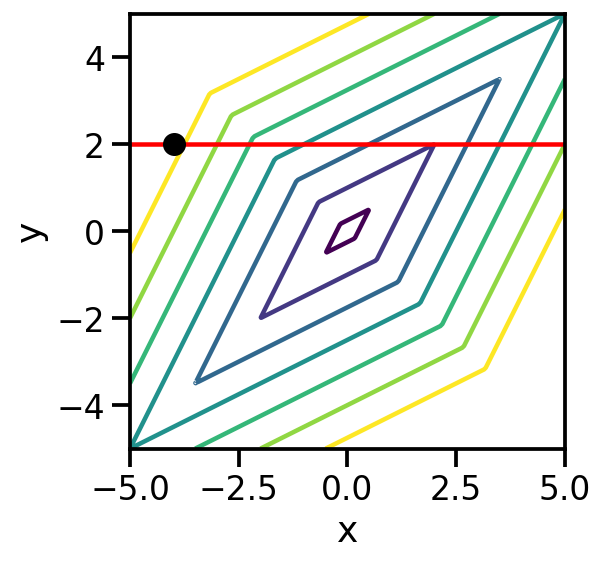

In [ ]:
x_start, y_start = -4, 2
plot_point(x_start, y_start)
plt.axhline(2, color='red')

In [ ]:
g = partial(f, y=2)
g

functools.partial(<function f at 0x136323310>, y=2)

In [ ]:
x_learn = torch.tensor(0., requires_grad = True)
optim = torch.optim.Adam([x_learn], lr=0.0005)

for i in range(3000):
    loss = g(x_learn)
    loss.backward()
    optim.step()
    if i%100==0:
        print(i, x_learn.item(), loss.item())

0 0.0004999999655410647 8.0
100 0.06779850274324417 7.865949630737305
200 0.14714795351028442 7.707312107086182
300 0.22784578800201416 7.545924663543701
400 0.3085353970527649 7.384539604187012
500 0.38880792260169983 7.223984718322754
600 0.4684963822364807 7.0645952224731445
700 0.5475249886512756 6.906523704528809
800 0.6258596777915955 6.74984073638916
900 0.7034878730773926 6.594569683074951
1000 0.7804093360900879 6.440712928771973
1100 0.8566311597824097 6.288255214691162
1200 0.9321646094322205 6.137174606323242
1300 1.0070239305496216 5.987442493438721
1400 1.0812252759933472 5.839026927947998
1500 1.1547856330871582 5.691894054412842
1600 1.2277231216430664 5.546006679534912
1700 1.3000539541244507 5.401332855224609
1800 1.371799349784851 5.257830619812012
1900 1.4429757595062256 5.115466594696045
2000 1.5136009454727173 4.974205493927002
2100 1.583693265914917 4.834010124206543
2200 1.6532690525054932 4.694848537445068
2300 1.7223458290100098 4.556684970855713
2400 1.790939

Hard to optimize! 

Text(0.5, 0, 'x')

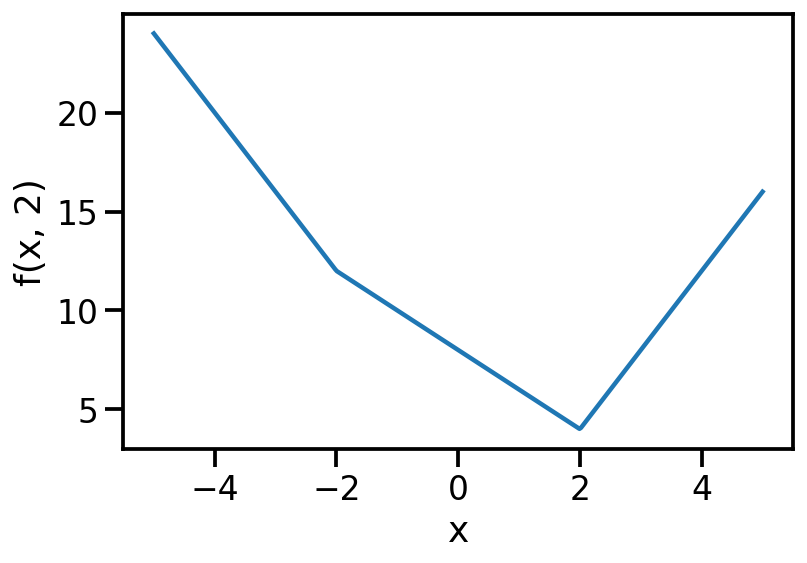

In [ ]:
x_dummy = torch.linspace(-5, 5, 400)
plt.plot(x_dummy, g(x_dummy))
plt.ylabel(f"f(x, 2)")
plt.xlabel("x")

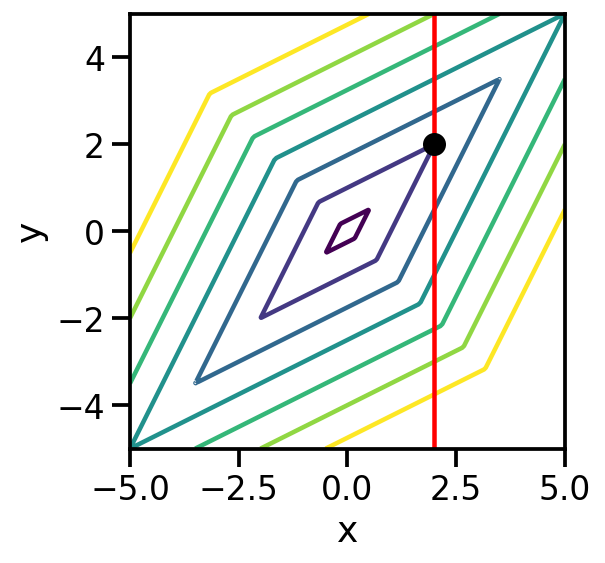

In [ ]:
x_start, y_start = 2, 2
plot_point(x_start, y_start)
plt.axvline(2, color='red')

https://stats.stackexchange.com/questions/146317/coordinate-vs-gradient-descent